## Final Project Submission

Please fill out:
* Student name: Eric Hansen
* Student pace: self paced
* Scheduled project review date/time: 6/8/2021
* Instructor name: Jeff Herman
* Blog post URL: https://ericthansen.medium.com/turning-csvs-into-sqlite-tables-with-python-faa921aace74


In [2]:
#Toggle this to True if you want to see more detailed output from cells, or to False if you want to see just the vital parts
notebook_verbose = True

# Initial Discussion
The movie industry has seen many shocks and innovations over the last decade, including new players like HBO, Netflix and Amazon, through their content delivery infrastructures, and the theater-shuttering, home-delivery-increasing impact of the global pandemic of COVID-19.  

Any relevant historic trends may also be noteworthy, including seasonal patterns but also year-to-year increases in consumption and spend on movies.  

From a business perspective, two primary goals/metrics seem likely to be most desirable: 
1) Monetary success.  This could be represented in a return-on-investment perspective, or a net dollars perspective.  For this exploration, we will focus on ROI because it's independent of inflation.  
2) Critical success.  This could be desirable in the interest of creating innovative and original art, or creating a good reputation, either of which could lead to future public interest and more business.  




In [3]:
#Initial Data Exploration with provided zip files

#####Unzipping Files
import gzip
import shutil
import os
z_folder = 'zippedData'
cwd = os.getcwd()
dir_to_unzip = os.path.join(cwd, z_folder)
#print(dir_to_unzip)
def unzipDir(dir_name, verbose=False):
    #takes as input a directory string and verbose boolean; unzips any file ending with .gz extension into the same folder
    for name in os.listdir(dir_name):
        path = os.path.join(dir_name, name)
        #print(path)
        if os.path.isfile(path) and path[-3:]=='.gz':
            if verbose:
                print('unzipping',path)
            new_name=name[:-3]
            new_path=os.path.join(dir_name,new_name)
            with gzip.open(path, 'rb') as f_in:
                with open(new_path, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
unzipDir(dir_to_unzip, verbose=True)

#Note: at end of Notebook, there is a cell that deletes local zipped files

unzipping C:\Users\erict\documents\flatiron\section01\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\bom.movie_gross.csv.gz
unzipping C:\Users\erict\documents\flatiron\section01\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.name.basics.csv.gz
unzipping C:\Users\erict\documents\flatiron\section01\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.akas.csv.gz
unzipping C:\Users\erict\documents\flatiron\section01\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.basics.csv.gz
unzipping C:\Users\erict\documents\flatiron\section01\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.crew.csv.gz
unzipping C:\Users\erict\documents\flatiron\section01\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.principals.csv.gz
unzipping C:\Users\erict\documents\flatiron\section01\dsc-mod-1-project-v2-1-online-ds-sp-000\zippedData\imdb.title.ratings.csv.gz
unzipping C:\Users\erict\documents\flatiron\section01\dsc-mod-1-project-v2-1-online-ds-sp-00

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dfs = {}


In [5]:
def make_dfs(dir_name):
    #takes as input a directory string, for any .csv file in it, creates a corresponding pandas dataframe
    for currfile in os.listdir(dir_name):
        path = os.path.join(dir_name, currfile)
        if os.path.isfile(path) and (path[-4:]=='.csv'):
            currdf = pd.read_csv(os.path.join(dir_name,currfile), header=0)
            dfs[currfile]=currdf
#make_dfs(dir_to_unzip) # in order to handle them with proper csv/tsv handling, I'll do it manually

In [6]:
dfs.keys()

dict_keys([])

# Data Sources

The following files come from the following sources:  
* Box Office Mojo
* IMDB
* Rotten Tomatoes
* TheMovieDB.org  
* TN ("The Numbers," probably)
Each file should have an abbreviation (BOM, IMDB, RT, TMDB, TN)  

Note, this section isn't automated to be deliberate about which files are compatible, and with which joins.


In [7]:
####Exploring tn.movie_budgets.csv

currfile='tn.movie_budgets.csv'
df_tn_movie_budgets = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_tn_movie_budgets']=df_tn_movie_budgets

if notebook_verbose:
    display(df_tn_movie_budgets)

id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3         $330,600,000   $459,005,868  $1,403,013,963  
4         $317,000,000   $620,181,382  $1,316,721,747  
...                ...            ...             ...  
5777            $7,000             $0              $0  
5778            $6,000        $48,482        $240,495  
5779            $5,000         $1,338          $1,338  
5780            $1,400             $0              $0  
5781            $1,100       $181,041        $181,041  

[5782 rows x 6 columns]

In [8]:
####Exploring imdb.title.principals.csv

currfile='imdb.title.principals.csv'
df_imdb_title_principals = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_imdb_title_principals']=df_imdb_title_principals
if notebook_verbose:
    display(df_imdb_title_principals)

tconst  ordering      nconst  category       job  \
0        tt0111414         1   nm0246005     actor       NaN   
1        tt0111414         2   nm0398271  director       NaN   
2        tt0111414         3   nm3739909  producer  producer   
3        tt0323808        10   nm0059247    editor       NaN   
4        tt0323808         1   nm3579312   actress       NaN   
...            ...       ...         ...       ...       ...   
1028181  tt9692684         1   nm0186469     actor       NaN   
1028182  tt9692684         2   nm4929530      self       NaN   
1028183  tt9692684         3  nm10441594  director       NaN   
1028184  tt9692684         4   nm6009913    writer    writer   
1028185  tt9692684         5  nm10441595  producer  producer   

                   characters  
0                 ["The Man"]  
1                         NaN  
2                         NaN  
3                         NaN  
4            ["Beth Boothby"]  
...                       ...  
1028181  ["Ebenezer Scrooge"]  
1028182   ["Herself","Regan"]  
1028183                   NaN  
1028184                   NaN  
1028185                   NaN  

[1028186 rows x 6 columns]

In [9]:
####Exploring imdb.title.ratings.csv

currfile='imdb.title.ratings.csv'
df_imdb_title_ratings = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_imdb_title_ratings']=df_imdb_title_ratings
if notebook_verbose:
    display(df_imdb_title_ratings)

tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

In [10]:
####Exploring imdb.title.akas.csv

currfile='imdb.title.akas.csv'
df_imdb_title_akas = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_imdb_title_akas']=df_imdb_title_akas
if notebook_verbose:
    display(df_imdb_title_akas)

title_id  ordering                                    title region  \
0       tt0369610        10                            Джурасик свят     BG   
1       tt0369610        11                        Jurashikku warudo     JP   
2       tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3       tt0369610        13                  O Mundo dos Dinossauros     BR   
4       tt0369610        14                           Jurassic World     FR   
...           ...       ...                                      ...    ...   
331698  tt9827784         2                       Sayonara kuchibiru    NaN   
331699  tt9827784         3                            Farewell Song    XWW   
331700  tt9880178         1                              La atención    NaN   
331701  tt9880178         2                              La atención     ES   
331702  tt9880178         3                            The Attention    XWW   

       language        types   attributes  is_original_title  
0            bg          NaN          NaN                0.0  
1           NaN  imdbDisplay          NaN                0.0  
2           NaN  imdbDisplay          NaN                0.0  
3           NaN          NaN  short title                0.0  
4           NaN  imdbDisplay          NaN                0.0  
...         ...          ...          ...                ...  
331698      NaN     original          NaN                1.0  
331699       en  imdbDisplay          NaN                0.0  
331700      NaN     original          NaN                1.0  
331701      NaN          NaN          NaN                0.0  
331702       en  imdbDisplay          NaN                0.0  

[331703 rows x 8 columns]

In [11]:
####Exploring imdb.title.basics.csv

currfile='imdb.title.basics.csv'
df_imdb_title_basics = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_imdb_title_basics']=df_imdb_title_basics
if notebook_verbose:
    display(df_imdb_title_basics)

tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
3                   NaN          Comedy,Drama  
4                  80.0  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139            123.0                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142            116.0                   NaN  
146143              NaN           Documentary  

[146144 rows x 6 columns]

In [12]:
####Exploring imdb.title.crew.csv

currfile='imdb.title.crew.csv'
df_imdb_title_crew = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_imdb_title_crew']=df_imdb_title_crew
if notebook_verbose:
    display(df_imdb_title_crew)

tconst                      directors              writers
0       tt0285252                      nm0899854            nm0899854
1       tt0438973                            NaN  nm0175726,nm1802864
2       tt0462036                      nm1940585            nm1940585
3       tt0835418                      nm0151540  nm0310087,nm0841532
4       tt0878654  nm0089502,nm2291498,nm2292011            nm0284943
...           ...                            ...                  ...
146139  tt8999974                     nm10122357           nm10122357
146140  tt9001390                      nm6711477            nm6711477
146141  tt9001494          nm10123242,nm10123248                  NaN
146142  tt9004986                      nm4993825            nm4993825
146143  tt9010172                            NaN            nm8352242

[146144 rows x 3 columns]

In [13]:
####Exploring imdb.name.basics.csv

currfile='imdb.name.basics.csv'
df_imdb_name_basics = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_imdb_name_basics']=df_imdb_name_basics
if notebook_verbose:
    display(df_imdb_name_basics)

nconst         primary_name  birth_year  death_year  \
0       nm0061671    Mary Ellen Bauder         NaN         NaN   
1       nm0061865         Joseph Bauer         NaN         NaN   
2       nm0062070           Bruce Baum         NaN         NaN   
3       nm0062195         Axel Baumann         NaN         NaN   
4       nm0062798          Pete Baxter         NaN         NaN   
...           ...                  ...         ...         ...   
606643  nm9990381         Susan Grobes         NaN         NaN   
606644  nm9990690          Joo Yeon So         NaN         NaN   
606645  nm9991320       Madeline Smith         NaN         NaN   
606646  nm9991786  Michelle Modigliani         NaN         NaN   
606647  nm9993380       Pegasus Envoyé         NaN         NaN   

                                      primary_profession  \
0              miscellaneous,production_manager,producer   
1             composer,music_department,sound_department   
2                             miscellaneous,actor,writer   
3       camera_department,cinematographer,art_department   
4       production_designer,art_department,set_decorator   
...                                                  ...   
606643                                           actress   
606644                                           actress   
606645                                           actress   
606646                                          producer   
606647                             director,actor,writer   

                               known_for_titles  
0       tt0837562,tt2398241,tt0844471,tt0118553  
1       tt0896534,tt6791238,tt0287072,tt1682940  
2       tt1470654,tt0363631,tt0104030,tt0102898  
3       tt0114371,tt2004304,tt1618448,tt1224387  
4       tt0452644,tt0452692,tt3458030,tt2178256  
...                                         ...  
606643                                      NaN  
606644                      tt9090932,tt8737130  
606645                      tt8734436,tt9615610  
606646                                      NaN  
606647                                tt8743182  

[606648 rows x 6 columns]

In [14]:
####Exploring rt.movie_info.tsv

currfile='rt.movie_info.tsv'
df_rt_movie_info = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0, delimiter='\t')
dfs['df_rt_movie_info']=df_rt_movie_info
if notebook_verbose:
    display(df_rt_movie_info)

id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Action and Adventure|Classics|Drama    William Friedkin   
1                     Drama|Science Fiction and Fantasy    David Cronenberg   
2                     Drama|Musical and Performing Arts      Allison Anders   
3                            Drama|Mystery and Suspense      Barry Levinson   
4                                         Drama|Romance      Rodney Bennett   
...                                                 ...                 ...   
1555   Action and Adventure|Horror|Mystery and Suspense                 NaN   
1556                 Comedy|Science Fiction and Fantasy        Steve Barron   
1557  Classics|Comedy|Drama|Musical and Performing Arts      Gordon Douglas   
1558    Comedy|Drama|Kids and Family|Sports and Fitness  David Mickey Evans   
1559  Action and Adventure|Art House and Internation...                 NaN   

                                                writer  theater_date  \
0                                       Ernest Tidyman   Oct 9, 1971   
1                         David Cronenberg|Don DeLillo  Aug 17, 2012   
2                                       Allison Anders  Sep 13, 1996   
3                      Paul Attanasio|Michael Crichton   Dec 9, 1994   
4                                         Giles Cooper           NaN   
...                                                ...           ...   
1555                                               NaN  Aug 18, 2006   
1556  Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner  Jul 23, 1993   
1557                                               NaN   Jan 1, 1962   
1558                  David Mickey Evans|Robert Gunter   Apr 1, 1993   
1559                                        Luc Besson  Sep 27, 2001   

          dvd_date currency  box_office      runtime             studio  
0     Sep 25, 2001      NaN         NaN  104 minutes                NaN  
1      Jan 1, 2013        $     600,000  108 minutes  Entertainment One  
2     Apr 18, 2000      NaN         NaN  116 minutes                NaN  
3     Aug 27, 1997      NaN         NaN  128 minutes                NaN  
4              NaN      NaN         NaN  200 minutes                NaN  
...            ...      ...         ...          ...                ...  
1555   Jan 2, 2007        $  33,886,034  106 minutes    New Line Cinema  
1556  Apr 17, 2001      NaN         NaN   88 minutes  Paramount Vantage  
1557  May 11, 2004      NaN         NaN  111 minutes                NaN  
1558  Jan 29, 2002      NaN         NaN  101 minutes                NaN  
1559  Feb 11, 2003      NaN         NaN   94 minutes  Columbia Pictures  

[1560 rows x 12 columns]

In [15]:
####Exploring rt.reviews.tsv

currfile='rt.reviews.tsv'
df_rt_reviews = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0, delimiter='\t', encoding= "ISO-8859-1")
dfs['df_rt_reviews']=df_rt_reviews
if notebook_verbose:
    display(df_rt_reviews)

id                                             review rating   fresh  \
0         3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1         3  It's an allegory in search of a meaning that n...    NaN  rotten   
2         3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3         3  Continuing along a line introduced in last yea...    NaN   fresh   
4         3             ... a perverse twist on neorealism...     NaN   fresh   
...     ...                                                ...    ...     ...   
54427  2000  The real charm of this trifle is the deadpan c...    NaN   fresh   
54428  2000                                                NaN    1/5  rotten   
54429  2000                                                NaN    2/5  rotten   
54430  2000                                                NaN  2.5/5  rotten   
54431  2000                                                NaN    3/5   fresh   

                  critic  top_critic         publisher                date  
0             PJ Nabarro           0   Patrick Nabarro   November 10, 2018  
1         Annalee Newitz           0           io9.com        May 23, 2018  
2           Sean Axmaker           0  Stream on Demand     January 4, 2018  
3          Daniel Kasman           0              MUBI   November 16, 2017  
4                    NaN           0      Cinema Scope    October 12, 2017  
...                  ...         ...               ...                 ...  
54427      Laura Sinagra           1     Village Voice  September 24, 2002  
54428  Michael Szymanski           0        Zap2it.com  September 21, 2005  
54429       Emanuel Levy           0   EmanuelLevy.Com       July 17, 2005  
54430   Christopher Null           0    Filmcritic.com   September 7, 2003  
54431    Nicolas Lacroix           0      Showbizz.net   November 12, 2002  

[54432 rows x 8 columns]

In [16]:
####Exploring tmdb.movies.Csv

currfile='tmdb.movies.csv'
df_tmdb_movies = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_tmdb_movies']=df_tmdb_movies
if notebook_verbose:
    #display(df_tmdb_movies[df_tmdb_movies[id==3]])
    display(df_tmdb_movies)

Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
...                                             ...         ...          ...   
26512                         Laboratory Conditions       0.600   2018-10-13   
26513                               _EXHIBIT_84xxx_       0.600   2018-05-01   
26514                                  The Last One       0.600   2018-10-01   
26515                                  Trailer Made       0.600   2018-06-22   
26516                                    The Church       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[26517 rows x 10 columns]

In [17]:
####Exploring bom.movie_gross.csv

currfile='bom.movie_gross.csv'
df_bom_movie_gross = pd.read_csv(os.path.join(dir_to_unzip,currfile), header=0)
dfs['df_bom_movie_gross']=df_bom_movie_gross
if notebook_verbose:
    display(df_bom_movie_gross)


title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]

# Data Sources Summary  
* df_tn_movie_budgets: contains domestic/worldwide gross, production budget by movie title

* df_imdb_title_principals: connects principals (e.g. actors/directors) to movies by a unique key
* df_imdb_title_ratings: connects movie (by unique key) to average rating and number of votes
* df_imdb_title_akas: includes title ids and titles
* df_imdb_title_basics: includes title ids, titles, year, runtime, genres
* df_imdb_title_crew: includes movie id with writer/director ids
* df_imdb_name_basics: includes individuals' IDs with their name, birthyear, profession, and known-for's

* df_rt_movie_info: this gives movie id with synopsis, studio and other info about movie; however, there is not a good crosswalk to movie title.  May be best to summarize by studio here.
* df_rt_reviews: this gives one or more critic reviews by movie id in above RT file

* df_tmdb_movies: this gives movie title, genre ids, language, popularity, average vote, and vote_count; 

* df_bom_movie_gross: movie title matched to studio, domestic/foreign gross, year (but unfortunately no budget!)  



# Data Drivers/Correlation Candidates  
Some questions:
- 1) How is overall movie gross product trending compared to the economy?
- 2) Are films' critical rating and ROI correlated?
- 3) Do high or low-budget films tend toward having good ROI/Rating?  
- 4) Do films of certain genres tend toward better ROI/Rating?
- 5) Do films with certain ratings (G-PG-R) tend to have better Critical Rating?  
- 6) What is the current market share of current studios, and what are their ROI/Critical Ratings?



In [18]:
len(dfs.keys())
dfs.keys()

dict_keys(['df_tn_movie_budgets', 'df_imdb_title_principals', 'df_imdb_title_ratings', 'df_imdb_title_akas', 'df_imdb_title_basics', 'df_imdb_title_crew', 'df_imdb_name_basics', 'df_rt_movie_info', 'df_rt_reviews', 'df_tmdb_movies', 'df_bom_movie_gross'])

It appears that there are some common columns between these tables.  We could make some aggregations using SQL queries if we join them, namely among the IMDB tables and the RT tables.  
So, let's import all the tables above into a sqlite3 database; potentially more if we can match on title/year (which we will do between RT and TN).

In [19]:
import sqlite3
from sqlite3 import Error
from pandas import DataFrame

####remake the following database name
#### delete the db at the end
def create_conn(path):
    #creates a sqlite connection , given a filename path string
    conn = None
    try:
        conn = sqlite3.connect(path)
        print("Connection successful")
    except Error as e:
            print("The error % occurred.".format(e))
    return conn
    
conn = create_conn('TestDB1.db') 
c = conn.cursor()

def convertDFtoSQL(df_name):
    #given a dataframe name string, creates a SQLITE table 
    #df_name='df_movie_budgets'
    df = dfs[df_name]
    cols = str(list(df.columns))[1:-1]
    createString = 'CREATE TABLE '+ df_name + '(' + cols + ')'
    try:
        c.execute(createString)
    except Error as e:
        pass
        print('SQL error:', e)
    df.to_sql(df_name, conn, if_exists='replace', index=False)
    
    
    c.execute('SELECT * FROM '+df_name)
    #Checking that it came through
    dfOut = pd.DataFrame(c.fetchall())
    dfOut.columns = [i[0] for i in c.description]
    if notebook_verbose:
        print(df_name)
        display(dfOut.head(4))

for df in dfs.keys():    
    convertDFtoSQL(df)
    #pass


Connection successful
SQL error: table df_tn_movie_budgets already exists
df_tn_movie_budgets


id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963

SQL error: table df_imdb_title_principals already exists
df_imdb_title_principals


tconst  ordering     nconst  category       job   characters
0  tt0111414         1  nm0246005     actor      None  ["The Man"]
1  tt0111414         2  nm0398271  director      None         None
2  tt0111414         3  nm3739909  producer  producer         None
3  tt0323808        10  nm0059247    editor      None         None

SQL error: table df_imdb_title_ratings already exists
df_imdb_title_ratings


tconst  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352

SQL error: table df_imdb_title_akas already exists
df_imdb_title_akas


title_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   

  language        types   attributes  is_original_title  
0       bg         None         None                0.0  
1     None  imdbDisplay         None                0.0  
2     None  imdbDisplay         None                0.0  
3     None         None  short title                0.0

SQL error: table df_imdb_title_basics already exists
df_imdb_title_basics


tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   

   start_year  runtime_minutes              genres  
0        2013            175.0  Action,Crime,Drama  
1        2019            114.0     Biography,Drama  
2        2018            122.0               Drama  
3        2018              NaN        Comedy,Drama

SQL error: table df_imdb_title_crew already exists
df_imdb_title_crew


tconst  directors              writers
0  tt0285252  nm0899854            nm0899854
1  tt0438973       None  nm0175726,nm1802864
2  tt0462036  nm1940585            nm1940585
3  tt0835418  nm0151540  nm0310087,nm0841532

SQL error: table df_imdb_name_basics already exists
df_imdb_name_basics


nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387

SQL error: table df_rt_movie_info already exists
df_rt_movie_info


id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001     None   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                   Allison Anders  Sep 13, 1996  Apr 18, 2000     None   
3  Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997     None   

  box_office      runtime             studio  
0       None  104 minutes               None  
1    600,000  108 minutes  Entertainment One  
2       None  116 minutes               None  
3       None  128 minutes               None

SQL error: table df_rt_reviews already exists
df_rt_reviews


id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...   None  rotten   
2   3  ... life lived in a bubble in financial dealin...   None   fresh   
3   3  Continuing along a line introduced in last yea...   None   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017

SQL error: table df_tmdb_movies already exists


C:\Users\erict\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


df_tmdb_movies


Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174

SQL error: table df_bom_movie_gross already exists
df_bom_movie_gross


title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010

In [20]:
for df in dfs.keys():
    print(df,':', list(dfs[df].columns))

df_tn_movie_budgets : ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']
df_imdb_title_principals : ['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']
df_imdb_title_ratings : ['tconst', 'averagerating', 'numvotes']
df_imdb_title_akas : ['title_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']
df_imdb_title_basics : ['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
df_imdb_title_crew : ['tconst', 'directors', 'writers']
df_imdb_name_basics : ['nconst', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles']
df_rt_movie_info : ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']
df_rt_reviews : ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date']
df_tmdb_movies : ['Unnamed: 0', 'genre_ids', 'id', 'original_language', 

# SQL Table Joins
From those independent SQL tables, we will join them together on common fields/relations to create some wider hybrid tables.

In [21]:
#df df_tn_movie_budgets - id field is nonunique here
#+rt_movie_info  id field seems good here
#+rt_reviews - id field is nonunique here - multiple reviews for each movie
#+ movies on id
#df_bom_movie_gross : ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

c.execute('''SELECT t1.movie, t1.release_date, substr(t1.release_date,length(t1.release_date)-3, 4) as year,
            t1.production_budget AS budget,
            t1.domestic_gross as Dom_gross, 
            t1.worldwide_gross as WW_gross,
            --t2.tconst,
            t2.runtime_minutes,
            t2.genres,
            t3.averagerating
          FROM df_tn_movie_budgets AS t1
          JOIN df_imdb_title_basics AS t2
          ON t2.primary_title = t1.movie AND t2.start_year = substr(t1.release_date,length(t1.release_date)-3, 4)
          JOIN df_imdb_title_ratings AS t3
          ON t2.tconst = t3.tconst
          
          --USING(id)
          --JOIN df_reviews
          --USING(id)
          ''')
# c.execute('''Select * from df_tn_movie_budgets
# WHERE id = '27'
# ORDER BY id desc
# ''')
#Checking that it came through
dfOut = pd.DataFrame(c.fetchall())
dfOut.columns = [i[0] for i in c.description]
if notebook_verbose:
    display(dfOut.head(4))
    display(len(dfOut))

df1=dfOut

movie  release_date  year  \
0  Pirates of the Caribbean: On Stranger Tides  May 20, 2011  2011   
1                                 Dark Phoenix   Jun 7, 2019  2019   
2                      Avengers: Age of Ultron   May 1, 2015  2015   
3                       Avengers: Infinity War  Apr 27, 2018  2018   

         budget     Dom_gross        WW_gross  runtime_minutes  \
0  $410,600,000  $241,063,875  $1,045,663,875            136.0   
1  $350,000,000   $42,762,350    $149,762,350            113.0   
2  $330,600,000  $459,005,868  $1,403,013,963            141.0   
3  $300,000,000  $678,815,482  $2,048,134,200            149.0   

                     genres  averagerating  
0  Action,Adventure,Fantasy            6.6  
1   Action,Adventure,Sci-Fi            6.0  
2   Action,Adventure,Sci-Fi            7.3  
3   Action,Adventure,Sci-Fi            8.5

1498

In [22]:
#df df_tn_movie_budgets - id field is nonunique here
#+rt_movie_info  id field seems good here
#+rt_reviews - id field is nonunique here - multiple reviews for each movie
#+ movies on id
#df_bom_movie_gross : ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

c.execute('''SELECT t1.movie, t1.release_date, substr(t1.release_date,length(t1.release_date)-3, 4) as year,
            t1.production_budget AS budget,
            t1.domestic_gross as Dom_gross, 
            t1.worldwide_gross as WW_gross,
            --t2.tconst,
            t2.runtime_minutes,
            t2.genres,
            t3.averagerating,
            t4.studio, 
            t4.domestic_gross,
            t4.foreign_gross
          FROM df_tn_movie_budgets AS t1
          JOIN df_imdb_title_basics AS t2
          ON t2.primary_title = t1.movie AND t2.start_year = substr(t1.release_date,length(t1.release_date)-3, 4)
          JOIN df_imdb_title_ratings AS t3
          ON t2.tconst = t3.tconst
          LEFT JOIN df_bom_movie_gross as t4
          ON t1.movie=t4.title  AND  substr(t1.release_date,length(t1.release_date)-3, 4)  = t4.year
          
          --USING(id)
          --JOIN df_reviews
          --USING(id)
          ''')
# c.execute('''Select * from df_tn_movie_budgets
# WHERE id = '27'
# ORDER BY id desc
# ''')
#Checking that it came through
dfOut = pd.DataFrame(c.fetchall())
dfOut.columns = [i[0] for i in c.description]
if notebook_verbose:
    display(dfOut.head(4))
    display(len(dfOut))

df1b=dfOut

movie  release_date  year  \
0  Pirates of the Caribbean: On Stranger Tides  May 20, 2011  2011   
1                                 Dark Phoenix   Jun 7, 2019  2019   
2                      Avengers: Age of Ultron   May 1, 2015  2015   
3                       Avengers: Infinity War  Apr 27, 2018  2018   

         budget     Dom_gross        WW_gross  runtime_minutes  \
0  $410,600,000  $241,063,875  $1,045,663,875            136.0   
1  $350,000,000   $42,762,350    $149,762,350            113.0   
2  $330,600,000  $459,005,868  $1,403,013,963            141.0   
3  $300,000,000  $678,815,482  $2,048,134,200            149.0   

                     genres  averagerating studio  domestic_gross  \
0  Action,Adventure,Fantasy            6.6     BV     241100000.0   
1   Action,Adventure,Sci-Fi            6.0   None             NaN   
2   Action,Adventure,Sci-Fi            7.3     BV     459000000.0   
3   Action,Adventure,Sci-Fi            8.5     BV     678800000.0   

  foreign_gross  
0     804600000  
1          None  
2     946400000  
3       1,369.5

1498

In [23]:
#

In [24]:
#RT reviews - fresh/rotten aggregate
#df_rt_movie_info : ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']
#df_rt_reviews : ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date']

#note that these movies only have id - there is no RT id-title map.  WIll have to fill in from elsewhere

#in order to map fresh/rotten to numerical data, quickly create a map table
try:
    c.execute(''' DROP TABLE fresh_rotten
    ''')

except:
    print("fresh_rotten table not yet created.")
try:
    c.execute(''' CREATE TABLE fresh_rotten(
                id INTEGER PRIMARY KEY,
                freshness TEXT,
                fresh_numeric REAL
                )
    ''')
    c.execute(''' INSERT INTO fresh_rotten(freshness, fresh_numeric)
                VALUES('fresh',1)
    ''')
    c.execute(''' INSERT INTO fresh_rotten(freshness, fresh_numeric)
                    VALUES('rotten',0)
    ''')
except:
    print('exception thrown')


# cur.execute("""CREATE TABLE cats (
#                                 id INTEGER PRIMARY KEY,
#                                 name TEXT,
#                                 age INTEGER,
#                                 breed TEXT )          
#             """)
       
# # insert Maru into the pet_database.db here
# cur.execute('''INSERT INTO cats (name, age, breed) 
#                   VALUES ('Maru', 3, 'Scottish Fold');
#             ''')

# c.execute('''SELECT t1.id AS ID, t1.rating AS GR_rating, t1.theater_date AS date, t1.studio AS Studio, t1.director AS director, t1.runtime AS runtime

#             FROM df_rt_movie_info AS t1

#           ''')

c.execute('''SELECT t1.id, t1.rating AS GR_rating, t1.theater_date AS date, t1.studio, t1.director, t1.runtime,
            COUNT(t2.rating) AS count_rating, AVG(t2.rating) AS avg_rating,
            COUNT(fresh_rotten.fresh_numeric) AS fresh_count, SUM(fresh_rotten.fresh_numeric) AS fresh_num, 
            AVG(fresh_rotten.fresh_numeric) AS fresh_avg
            --t3.averagerating, t3.numvotes
            FROM df_rt_movie_info AS t1
            JOIN df_rt_reviews AS t2
            ON t2.id = t1.id 
            JOIN fresh_rotten
            ON fresh_rotten.freshness = t2.fresh
            GROUP BY t1.id, t1.theater_date
            ''')

# c.execute('''Select * from df_tn_movie_budgets
#     WHERE id = '27'
#     ORDER BY id desc
# ''')
#c.execute('''SELECT * FROM fresh_rotten''')
#Checking that it came through
dfOut = pd.DataFrame(c.fetchall())
#display(c.description)
dfOut.columns = [i[0] for i in c.description]

if notebook_verbose:
    display(dfOut.head())
    display(len(dfOut))

df2 = dfOut

id GR_rating          date                 studio          director  \
0   3         R  Aug 17, 2012      Entertainment One  David Cronenberg   
1   5         R  Sep 13, 1996                   None    Allison Anders   
2   6         R   Dec 9, 1994                   None    Barry Levinson   
3   8        PG   Mar 3, 2000  Warner Bros. Pictures       Jay Russell   
4  10     PG-13  Jan 11, 2002     Paramount Pictures       Jake Kasdan   

       runtime  count_rating  avg_rating  fresh_count  fresh_num  fresh_avg  
0  108 minutes           113    2.747788          163      103.0   0.631902  
1  116 minutes            20    3.325000           23       18.0   0.782609  
2  128 minutes            41    2.841463           57       32.0   0.561404  
3   95 minutes            40    3.650000           75       56.0   0.746667  
4   82 minutes            61    2.409836          108       50.0   0.462963

1135

In [25]:
#

In [26]:
c.execute('''SELECT * 
            FROM df_imdb_name_basics
          ''')

#Checking that it came through
dfOut = pd.DataFrame(c.fetchall())
dfOut.columns = [i[0] for i in c.description]
if notebook_verbose:
    display(dfOut.head(5))
    display(len(dfOut))
df3 = dfOut

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

606648

In [27]:
#df imdb titleprincipals/ratings/basics/crew on tconst (which functions as a unique key for films; nconst is for people)

# df_imdb_title_principals : ['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']
# df_imdb_title_ratings : ['tconst', 'averagerating', 'numvotes']
# df_imdb_title_akas : ['title_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']
# df_imdb_title_basics : ['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
# df_imdb_title_crew : ['tconst', 'directors', 'writers']
# df_imdb_name_basics : ['nconst', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles']
    
c.execute('''SELECT * 
          FROM df_imdb_title_principals
          JOIN df_imdb_title_ratings
          USING(tconst)
          JOIN df_imdb_title_basics
          USING(tconst)
          JOIN df_imdb_title_akas
          ON df_imdb_title_basics.tconst = df_imdb_title_akas.title_id AND df_imdb_title_basics.original_title = df_imdb_title_akas.title
          JOIN df_imdb_name_basics
          ON df_imdb_name_basics.nconst = df_imdb_title_principals.nconst


          --JOIN df_imdb_title_crew -- title/crew matches tconst to directors and writers nconst vals.  not sure i want it
          --USING(tconst) 
          WHERE df_imdb_title_akas.region IS NULL
          ''')

#Checking that it came through
dfOut = pd.DataFrame(c.fetchall())
dfOut.columns = [i[0] for i in c.description]

if notebook_verbose:
    display(dfOut.head(10))
    display(len(dfOut))
df4 = dfOut

tconst  ordering     nconst  category  \
0  tt0369610         1  nm0695435     actor   
1  tt0369610         2  nm0397171   actress   
2  tt0369610         3  nm1339223     actor   
3  tt0369610         4  nm0339460   actress   
4  tt0369610         5  nm1119880  director   
5  tt0369610         6  nm0415425    writer   
6  tt0369610         7  nm0798646    writer   
7  tt0369610         8  nm2081046    writer   
8  tt0369610         9  nm0000341    writer   
9  tt0369610        10  nm0189777  producer   

                                  job  characters  averagerating  numvotes  \
0                                None    ["Owen"]            7.0    539338   
1                                None  ["Claire"]            7.0    539338   
2                                None    ["Gray"]            7.0    539338   
3                                None   ["Karen"]            7.0    539338   
4                                None        None            7.0    539338   
5                       screenplay by        None            7.0    539338   
6                       screenplay by        None            7.0    539338   
7                       screenplay by        None            7.0    539338   
8  based on the characters created by        None            7.0    539338   
9                            producer        None            7.0    539338   

    primary_title  original_title  ...  language     types attributes  \
0  Jurassic World  Jurassic World  ...      None  original       None   
1  Jurassic World  Jurassic World  ...      None  original       None   
2  Jurassic World  Jurassic World  ...      None  original       None   
3  Jurassic World  Jurassic World  ...      None  original       None   
4  Jurassic World  Jurassic World  ...      None  original       None   
5  Jurassic World  Jurassic World  ...      None  original       None   
6  Jurassic World  Jurassic World  ...      None  original       None   
7  Jurassic World  Jurassic World  ...      None  original       None   
8  Jurassic World  Jurassic World  ...      None  original       None   
9  Jurassic World  Jurassic World  ...      None  original       None   

  is_original_title     nconst         primary_name birth_year death_year  \
0               1.0  nm0695435          Chris Pratt     1979.0        NaN   
1               1.0  nm0397171  Bryce Dallas Howard     1981.0        NaN   
2               1.0  nm1339223          Ty Simpkins        NaN        NaN   
3               1.0  nm0339460           Judy Greer     1975.0        NaN   
4               1.0  nm1119880      Colin Trevorrow     1976.0        NaN   
5               1.0  nm0415425           Rick Jaffa     1956.0        NaN   
6               1.0  nm0798646        Amanda Silver     1963.0        NaN   
7               1.0  nm2081046       Derek Connolly        NaN        NaN   
8               1.0  nm0000341     Michael Crichton     1942.0     2008.0   
9               1.0  nm0189777      Patrick Crowley        NaN        NaN   

                               primary_profession  \
0                       actor,soundtrack,producer   
1                         actress,director,writer   
2                                           actor   
3                     actress,producer,soundtrack   
4                        writer,producer,director   
5                           writer,producer,actor   
6                         writer,producer,actress   
7                           writer,producer,actor   
8                        writer,producer,director   
9  producer,assistant_director,production_manager   

                          known_for_titles  
0  tt1490017,tt0369610,tt1266020,tt2015381  
1            tt1454029,tt0369610,tt1800302  
2  tt0369610,tt1300854,tt4154796,tt1591095  
3  tt0369610,tt0337563,tt0478970,tt0988595  
4  tt0369610,tt4881806,tt4572792,tt1862079  
5  tt1318514,tt2103281,tt3450958,tt0369610  
6  tt2103281,tt1318514,tt0369610,tt3450958  
7  tt4881806,tt0369610,tt5884052,

333490

In [28]:
#df5 - using BOM file, linking in budget if possible and wwgross validation
#Though there are mismatches with df1b, I will continue to use this Studio-Gross view to look at one source
#Of complete gross revenue data by studio

#Not necessary since not actually changing df_bom_movie_gross at all.

#df_bom_movie_gross : ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
c.execute('''SELECT * 
          FROM df_bom_movie_gross AS t1
          ''')

#Checking that it came through
dfOut = pd.DataFrame(c.fetchall())
dfOut.columns = [i[0] for i in c.description]

if notebook_verbose:
    display(dfOut.head(10))
    display(len(dfOut))
df5 = dfOut

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   
5                   The Twilight Saga: Eclipse   Sum.     300500000.0   
6                                   Iron Man 2   Par.     312400000.0   
7                                      Tangled     BV     200800000.0   
8                                Despicable Me   Uni.     251500000.0   
9                     How to Train Your Dragon   P/DW     217600000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
5     398000000  2010  
6     311500000  2010  
7     391000000  2010  
8     291600000  2010  
9     277300000  2010

3387

# Caveat:  
Not all of the above created tables will end up being used, but were investigated. They could be used for further digging if desired.


# Some dataframe cleaning

In [29]:
#Some dataframe cleaning
#on df1

def textDate_to_dateTime(textdate):
    #converts date of the format Jan 1, 2000 into a string m/d/yr
    #to be used as a lambda function on df below
    td = textdate.split(' ')
    md = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    mo = str(md[td[0]])
    da = str(int(td[1][:-1]))
    yr = str(int(td[2]))
    return mo+'/'+da+'/'+yr

#display(df1.head())
df1.info()
df1['budget'] = df1['budget'].replace('[\$\,\.]',"",regex=True).astype(int)
df1['Dom_gross'] = df1['Dom_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
df1['WW_gross'] = df1['WW_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
df1['runtime_minutes'] = df1['runtime_minutes'].astype(float)
df1['averagerating'] = df1['averagerating'].astype(float)
df1['year']=df1['year'].astype(int)
df1['For_gross'] = df1['WW_gross']-df1['Dom_gross']
try:
    df1['release_date'] = pd.to_datetime(df1['release_date'].map(lambda x: textDate_to_dateTime(x)), format='%m/%d/%Y')
except:
    'release_date already converted'

#NA values will just be dropped
df1.dropna(inplace=True)


df1['ROI'] = (df1['WW_gross'])/df1['budget']-1

#In later investigation, I noticed that some ROI was massively high - either an outlier or an error, in either case, I'll remove
index_names = df1[ df1['ROI'] >75 ].index
#display('index_names',index_names)
# drop these row indexes
# from dataFrame
df1.drop(index_names, inplace = True)

df1.info()
#df1.head()
df1.duplicated().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie            1498 non-null   object 
 1   release_date     1498 non-null   object 
 2   year             1498 non-null   object 
 3   budget           1498 non-null   object 
 4   Dom_gross        1498 non-null   object 
 5   WW_gross         1498 non-null   object 
 6   runtime_minutes  1490 non-null   float64
 7   genres           1496 non-null   object 
 8   averagerating    1498 non-null   float64
dtypes: float64(2), object(7)
memory usage: 105.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 0 to 1497
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   movie            1488 non-null   object        
 1   release_date     1488 non-null   datetime64[ns]
 2   year      

count      1488
unique        1
top       False
freq       1488
dtype: object

## Investigation

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
sns.set_context('notebook') #and other options
#display(plt.style.available)
# with plt.style.context('seaborn-colorblind'):
#     plt.scatter([1,2,3],[4,5,6])
#     plt.xlabel('Xlabel')
#     plt.ylabel('Ylabel');

We can now look into questions 1, 2, and 3 using information in df1.
To review:
1) How is overall movie gross product trending compared to the economy?  
2) Are films' critical rating and ROI correlated?  
3) Do high or low-budget films tend toward having good ROI/Rating?  

In [32]:
#It appears 2019 data is incomplete.
display(df1.release_date.describe())


<ipython-input-32-24a41bc0d142>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df1.release_date.describe())


count                    1488
unique                    601
top       2014-12-31 00:00:00
freq                       12
first     2010-01-08 00:00:00
last      2019-08-14 00:00:00
Name: release_date, dtype: object

# Furthermore, it hasn't had time to "complete"; 
That is, theater runs for films released in 2019 might not finish until mid 2020.  If we had box office info
by date or month, we could compute a completion factor to multiply recent data by to true it up to past data, 
but we don't have that level of detail.
So, let's remove 2019 release dates in any year-to-year comparisons.

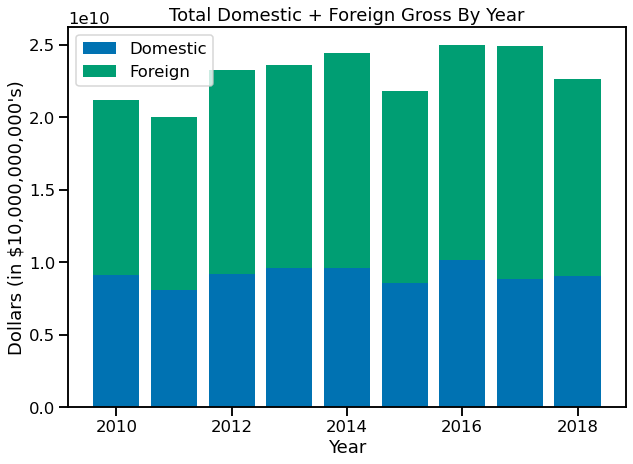

In [110]:
#General Trend
#1) How is overall movie gross product trending compared to the economy?

#df.hist
#df1.plot.bar('Year', 'Total_gross', colormap = 'viridis');
df1YearGrouped = df1.groupby('year').sum()
#df1YearGrouped = df1YearGrouped[]
try:
    df1YearGrouped = df1YearGrouped.drop(2019)
except:
    print('2019 already removed')
#display(df1YearGrouped.index)
#display(df1YearGrouped.budget)

with plt.style.context('seaborn-colorblind'):
#with plt.style.context('fivethirtyeight'):
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(10, 7))

    ax.bar(x=df1YearGrouped.index, height = df1YearGrouped['Dom_gross'], label='Domestic')
    ax.bar(x=df1YearGrouped.index, height = df1YearGrouped['For_gross'], bottom=df1YearGrouped['Dom_gross'], label='Foreign')

    ax.set_title('Total Domestic + Foreign Gross By Year')
    ax.set_xlabel('Year')
    ax.set_ylabel('Dollars (in $10,000,000,000\'s)')
    #ax.bar_label()
    ax.legend()
    #ax.axvline(df1['Total_gross'].mean(), color='black');


Based only on these 8 years of data (the ninth year appears incomplete), there is some overall upward trend (a correlation of about 0.09 as seen below), but due to lack of recent data, it would be prudent to proceed with caution until global economic trends bounce back after the pandemic, or at least to acquire more refreshed data.  

In [111]:
#A plot of same data but using Seaborn reg plot (to view the regression line)
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.regplot(
    x=df1YearGrouped.index,
    y=df1YearGrouped.Dom_gross+df1YearGrouped.For_gross
)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel ('Worldwide Gross in $10 Billions', fontsize = 15)
sns.set_context('talk')
#confidence interval is 95 by default

In [121]:
# computing the regression line trend
deltax=ax.get_lines()[0].get_xdata()[-1]-ax.get_lines()[0].get_xdata()[0]
deltay=ax.get_lines()[0].get_ydata()[-1]-ax.get_lines()[0].get_ydata()[0]
slope=deltay/deltax
display(slope,'dollars per year')
display(slope/ax.get_lines()[0].get_ydata()[0])
display(slope/ax.get_lines()[0].get_ydata()[-1])
#compare with inflation rate of 1.79% per year

367284725.9833374

'dollars per year'

0.017085152782965882

0.015030733725802565

In [35]:
#2) Are films' critical rating and ROI correlated?
display(df1.corr())

year    budget  Dom_gross  WW_gross  runtime_minutes  \
year             1.000000  0.063424   0.082469  0.090569         0.122348   
budget           0.063424  1.000000   0.714968  0.788344         0.369780   
Dom_gross        0.082469  0.714968   1.000000  0.945473         0.313833   
WW_gross         0.090569  0.788344   0.945473  1.000000         0.322459   
runtime_minutes  0.122348  0.369780   0.313833  0.322459         1.000000   
averagerating    0.033972  0.221264   0.322831  0.304447         0.389207   
For_gross        0.090862  0.792448   0.873266  0.984345         0.312563   
ROI              0.060084 -0.026301   0.283866  0.249055         0.026840   

                 averagerating  For_gross       ROI  
year                  0.033972   0.090862  0.060084  
budget                0.221264   0.792448 -0.026301  
Dom_gross             0.322831   0.873266  0.283866  
WW_gross              0.304447   0.984345  0.249055  
runtime_minutes       0.389207   0.312563  0.026840  
averagerating         1.000000   0.280749  0.187518  
For_gross             0.280749   1.000000  0.218968  
ROI                   0.187518   0.218968  1.000000

At first glance, there is not a strong relation between return on investment and any other category.  
Runtime has a surprisingly sizable correlation to rating - but not to ROI - but not high enough to make much in the way of  prediction.  

To our question 3, Budget has a .22 correlation coefficient with average rating - not above our usual threshold of .6, but not insignificant either.  
Budget has a small negative correlation with ROI which we will classify as insignificant.  


One other takeaway here is that if the client were to target ROI or Critical Rating success, they would not necessarily find success in the other category.

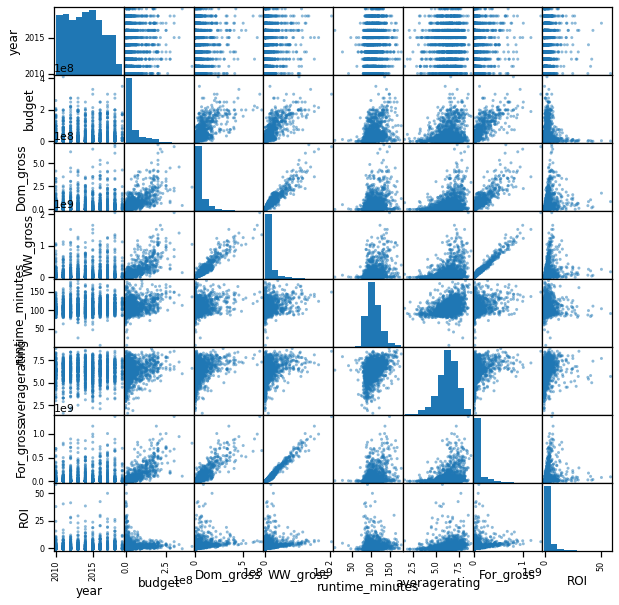

In [36]:
#Let's see if there's any visual trends in a scatter matrix. - It doesn't appear that there is much.
pd.plotting.scatter_matrix(df1, figsize=(10,10));
#pivot1a = df1.pivot(index='year', columns = 'genres', values=aver('ROI'))#, columns='business_id', values='stars'

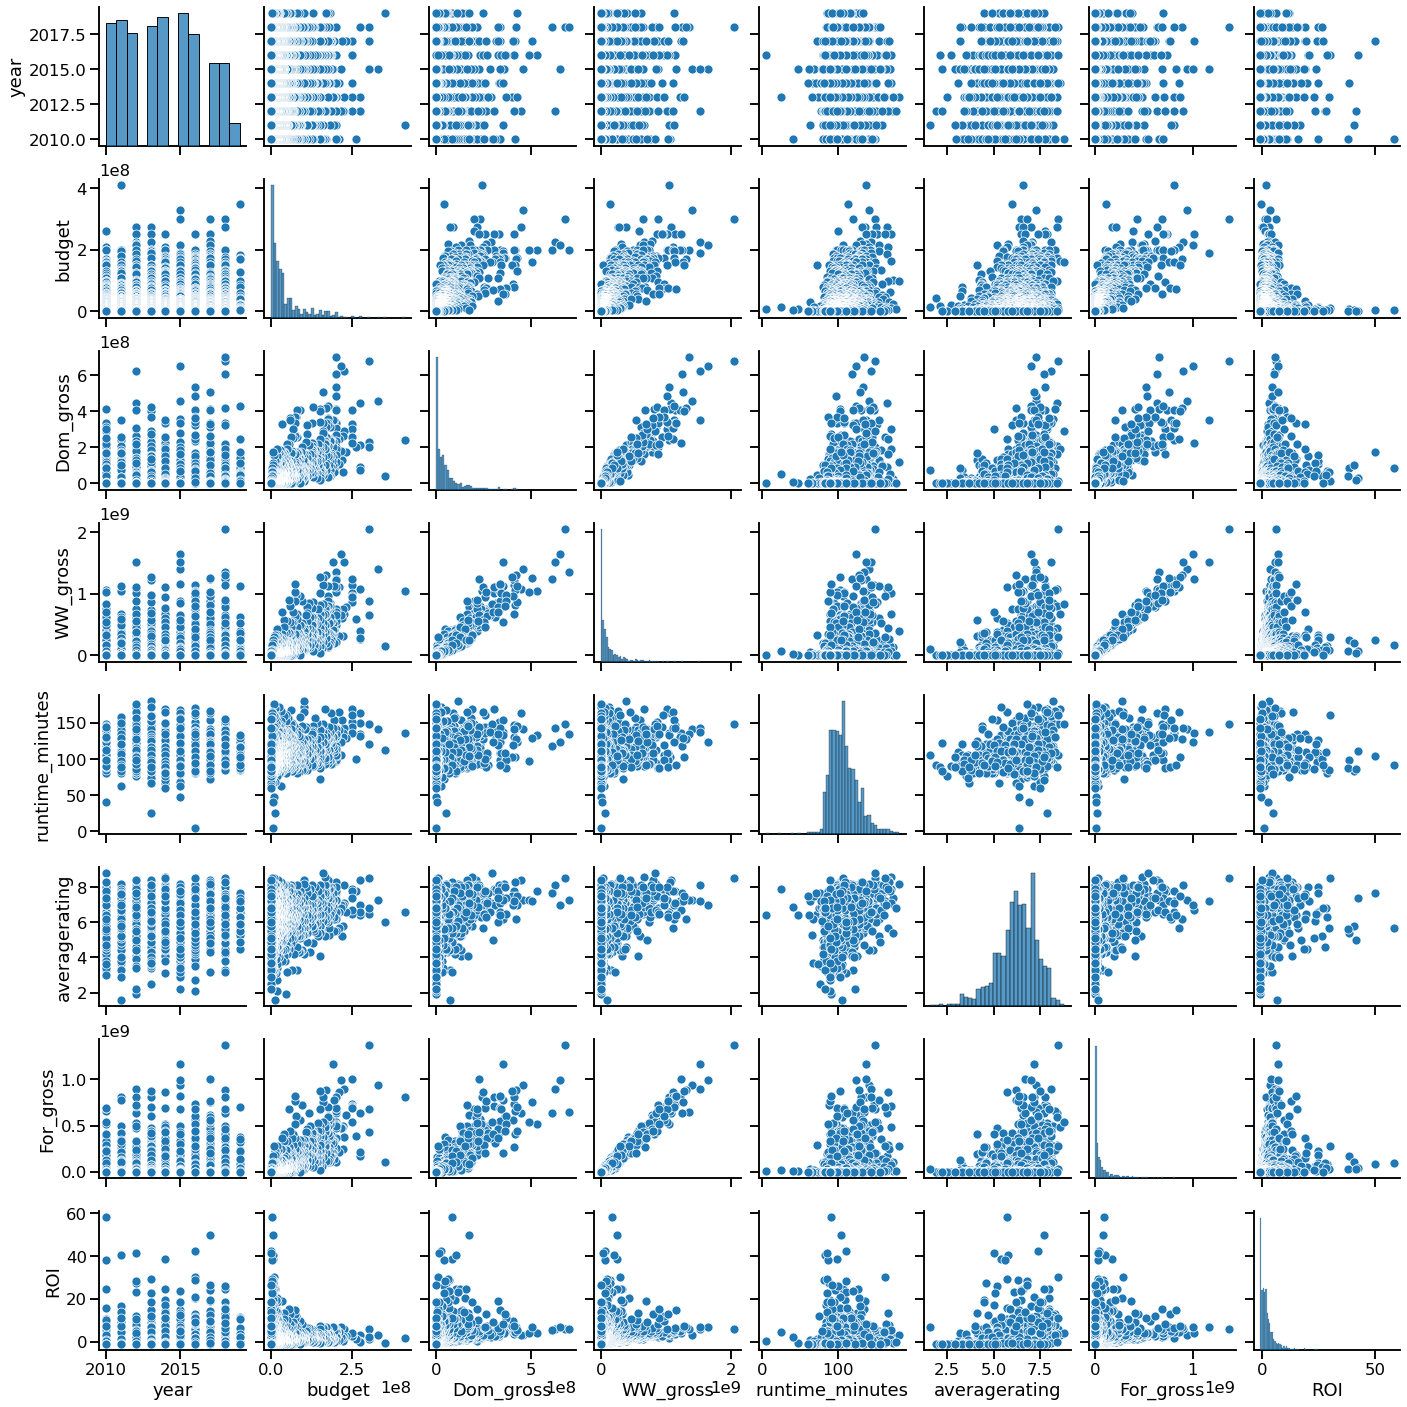

In [122]:
#Let's look at the Seaborn version of that too
sns.pairplot(df1)
sns.set_context('talk')

In [103]:
#Finally, let's see if we can at least identify any clustering of rating/ROI relationship - by individual movie
fig, ax = plt.subplots(figsize=(15,15))
#sns.distplot(data, ax = ax)

sns.scatterplot(x='averagerating', y='ROI', data = df1, ax = ax)
ax.set_xlim(0, 10) 
ax.set_ylim(-1, 75)

(-1.0, 75.0)

It appears there's no real clustering or visible pattern.  The following visualization is somewhat informative but ultimately I don't know it'll make the presentation since it's too busy.

In [109]:

#Another view - labelling each point. This creates a somewhat busy visualization, but can impart some useful info around 
#the edges
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']),
                fontdict=dict(color='purple',
                              alpha=.5, #1-0.5*abs(point['x']-7.5),
                              size=max(30,(abs(point['x']-7.5)/8*12 + abs(point['y']-1)/20*12))))

fig, ax = plt.subplots(figsize=(10,10))
label_point(df1.averagerating, df1.ROI, df1.movie, plt.gca())


# Continuing investigation  

4) Do films of certain genres tend toward better ROI/Rating?  
We can still use df1 for this.

21 items: {'Action': 62, 'Adventure': 41, 'Fantasy': 33, 'Sci-Fi': 29, 'Thriller': 32, 'Western': 7, 'Animation': 8, 'Comedy': 67, 'Family': 25, 'Crime': 29, 'Drama': 98, 'Musical': 8, 'Horror': 34, 'Romance': 26, 'Mystery': 30, 'History': 11, 'Documentary': 11, 'Biography': 24, 'War': 8, 'Sport': 12, 'Music': 15}


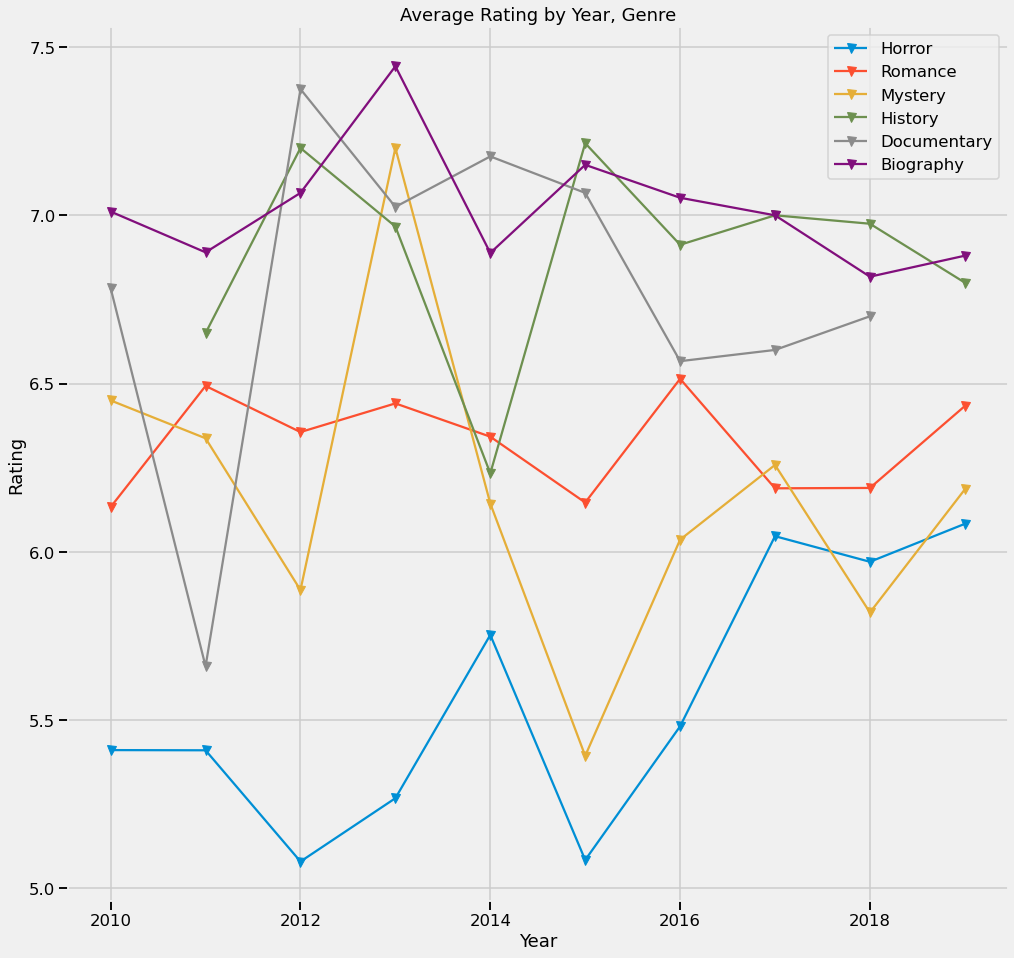

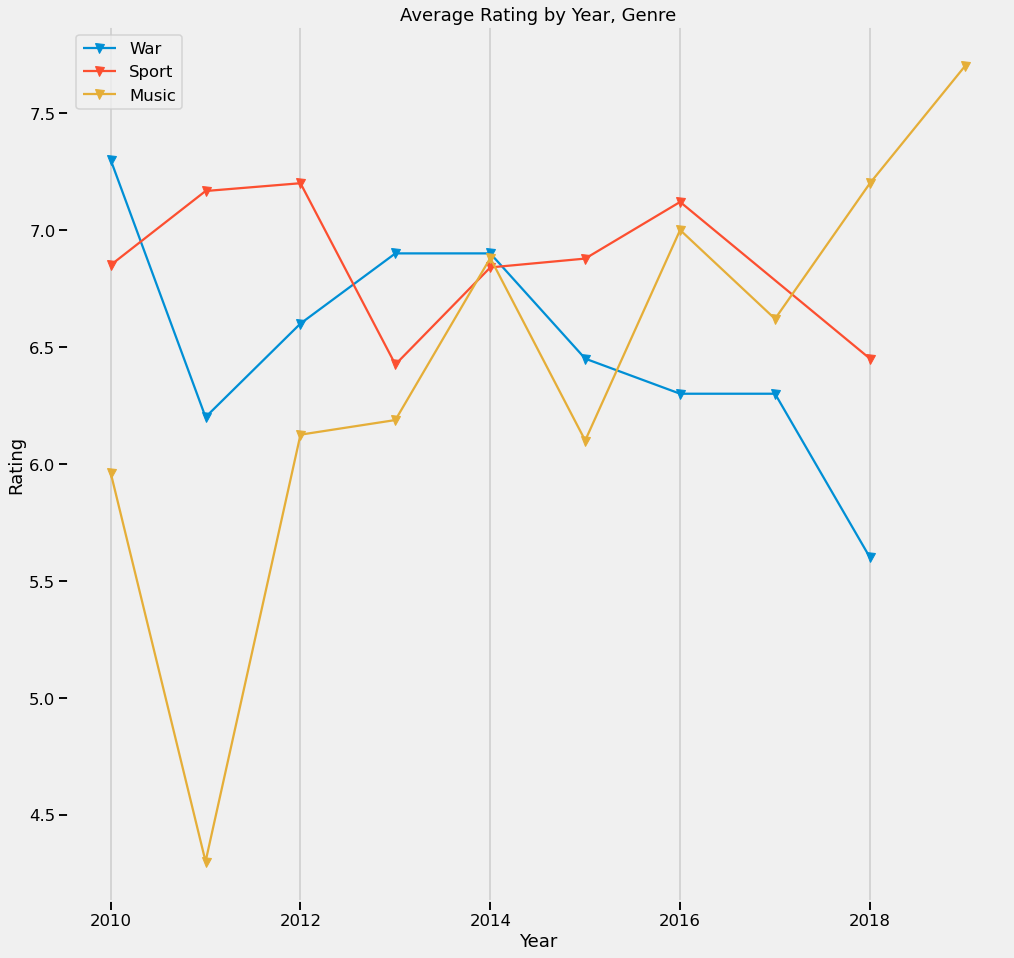

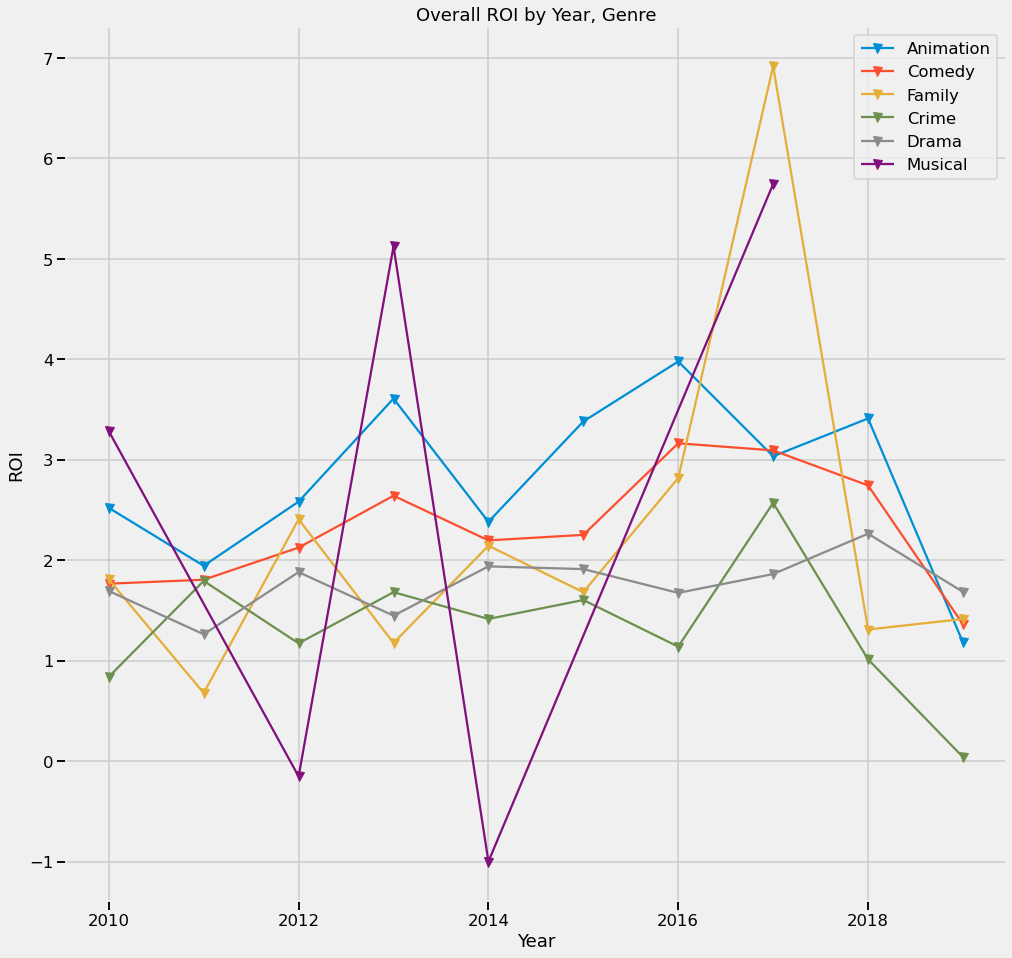

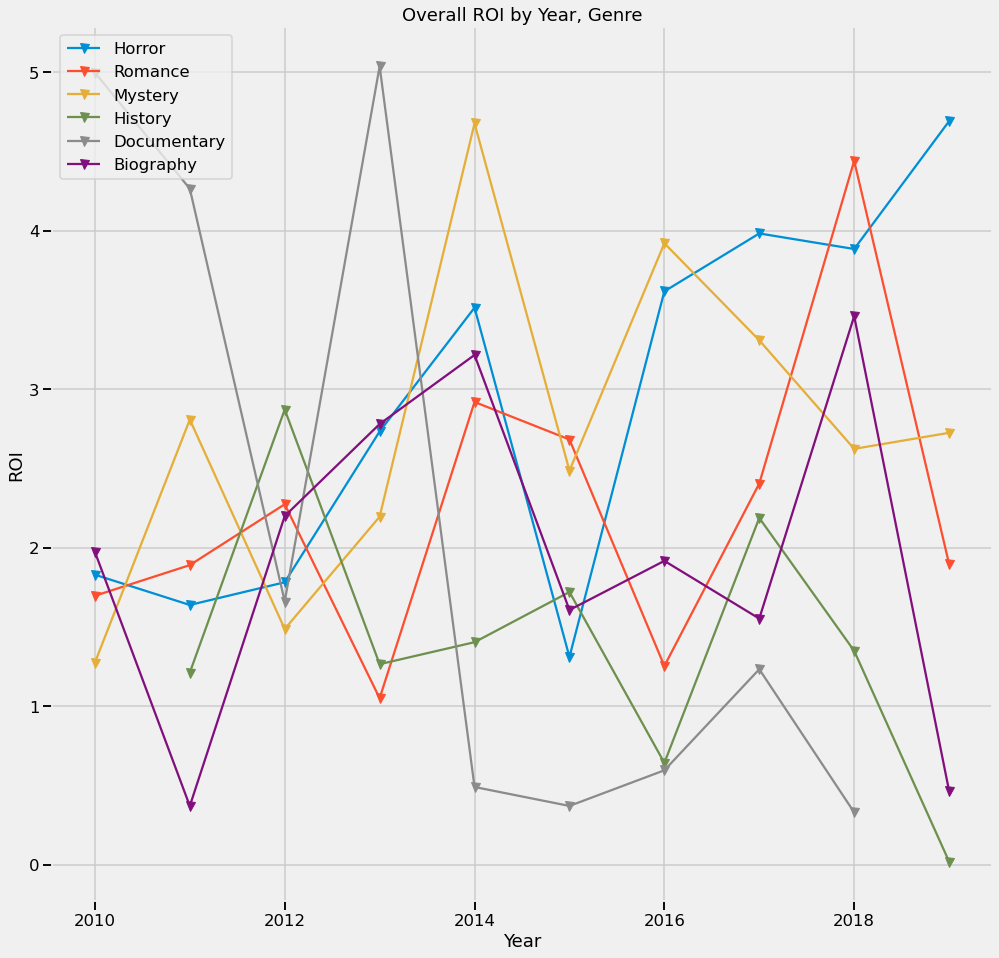

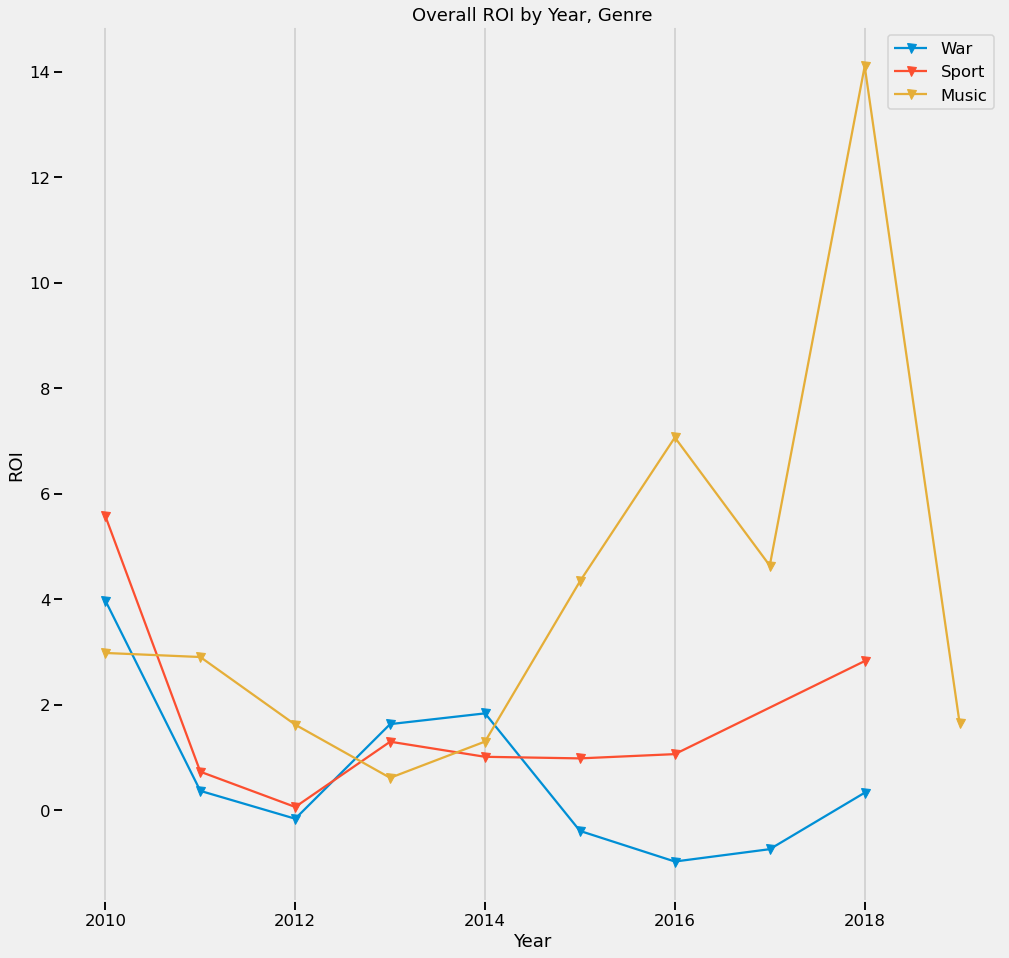

In [123]:
# We want each individual genre contained in the genre categorization collections for each movie.
#Rather than pull them out manually, we can parse the entries of the genre column like so...
#this function takes in the genres column from df1 and returns a dictionary with genres as keys and counts of appearances
#as values
genrecombinations = df1.genres.unique()
def createGenreDict(combinations):
        #given a list of combinations of genres (e.g. "action, adventure, fantasy"), it splits them apart into individual
        #genres and also counts how many times each appears as the values of the output dictionary.
    gdict={}
    for c in combinations:
        clist=c.split(',')
        #print(clist)>
        for g in clist:
            try:
                gdict[g] += 1
            except:
                gdict[g] = 1
    return gdict
genreDictionary = createGenreDict(genrecombinations)
if notebook_verbose:
    print(len(genreDictionary),'items:',genreDictionary)


##########
#Now that we have genres, we can subset the df1 table by each genre
    

df1_genre_year_sum = {}
df1_genre_year_mean = {}
for genre in genreDictionary.keys():
    filtered = df1['genres'].str.contains(genre,na=False)
    #display(genre, df1[filtered]) #debugging
    filtdf1=df1[filtered]
    
    #display(filtered.columns)#debugging
    filteredsummed = filtdf1.groupby('year').sum()
    filteredaveraged = filtdf1.groupby('year').mean()
#    filteredgrouped['ROI']=filteredgrouped[Dom]
    filteredsummed['ROI'] = filteredsummed['WW_gross']/filteredsummed['budget']-1
    filteredaveraged['ROI'] = filteredaveraged['WW_gross']/filteredaveraged['budget']-1
    df1_genre_year_sum[genre] = filteredsummed
    df1_genre_year_mean[genre] = filteredaveraged
    
#Now, lets define a visualization function for each genre series
def vis_genre(gDict, metric, title, ylabel):
    #It takes a genre dictionary, a metric (averagerating or ROI), a graph title, and a y-axis label,
    #and creates a visualization.  To avoid color reuse, it will create a separate one for each set of 6 genres
    
    #with plt.style.context('seaborn-colorblind'):
    with plt.style.context('fivethirtyeight'):
        #plt.style.use('ggplot')
        sns.set_context('talk')
        fig, ax = plt.subplots(figsize=(15,15))
        count=0
        for genre in gDict.keys():
            gdata = gDict[genre]
            ax.plot(gdata.index, gdata[metric], 'v-', label=genre)
            #ax.xaxis.set_minor_locator(md.MonthLocator()) 
            #ax.xaxis.set_minor_formatter(md.DateFormatter('%y'))

            ax.xaxis.grid(True, which="minor")
            ax.yaxis.grid()
            
            ax.set_title(title)
            ax.set_xlabel('Year')
            ax.set_ylabel(ylabel)
    
            ax.legend()

            #ax.xaxis.set_major_locator(md.YearLocator())
            #ax.xaxis.set_major_formatter(md.DateFormatter('\n\n%Y'))
            #g = sns.FacetGrid(gdata, height=8, aspect=1.5)
            #g.map(sns.pointplot, 'Year', 'ROI')
            if count % 6 ==5:
                plt.show()
                fig, ax = plt.subplots(figsize=(15,15))
            count+=1
    
df1_genre_year_mean 
#vis_genre(df1_genre_year_sum, 'averagerating', 'Average Rating by year, genre', ylabel='Rating')

vis_genre(df1_genre_year_mean,'averagerating', 'Average Rating by Year, Genre', ylabel='Rating')

vis_genre(df1_genre_year_sum,'ROI', 'Overall ROI by Year, Genre', ylabel='ROI')



In [42]:
df1.columns

Index(['movie', 'release_date', 'year', 'budget', 'Dom_gross', 'WW_gross',
       'runtime_minutes', 'genres', 'averagerating', 'For_gross', 'ROI'],
      dtype='object')

# Next question
5) Do films with certain ratings (G-PG-R) tend to have better Critical Rating?  

For this question, we will branch into df2.  


In [43]:
#df2 cleaning and digging

def fixRuntime(runtime):
    #removes the " minutes" from the runtime field
    try:
        if type(runtime) == float:
            return runtime
        elif runtime[-8:] ==' minutes':
            r = runtime[:-8]
        elif runtime[-7:] ==' minute':
            r = runtime[:-7]
        elif runtime == None:
            r = '0'
        else:
            r = runtime
    except:    
        r=runtime
        return 0
    if len(r)==0:
        return 0
    else:
        return float(r)

df2.info()
display(df2.head())
print('\n cleaning \n ')
df2['count_rating'] = df2['count_rating'].astype(int)
df2['avg_rating'] = df2['avg_rating'].astype(float)
df2['tot_rating'] = df2['count_rating']*df2['avg_rating']
df2['fresh_count'] = df2['fresh_count'].astype(int)
df2['fresh_num'] = df2['fresh_num'].astype(float)
df2['fresh_avg'] = df2['fresh_avg'].astype(float)
#removing the " minutes" from the runtime
df2['runtime'] = df2['runtime'].map(lambda x: fixRuntime(x)).astype(float)

#There are some missing values in some columns - we won't use all the columns;
#where necessary we can just omit these rows.

df2.head()
df2.info()
df2.head()
df2.duplicated().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1135 non-null   int64  
 1   GR_rating     1134 non-null   object 
 2   date          996 non-null    object 
 3   studio        415 non-null    object 
 4   director      1014 non-null   object 
 5   runtime       1123 non-null   object 
 6   count_rating  1135 non-null   int64  
 7   avg_rating    1116 non-null   float64
 8   fresh_count   1135 non-null   int64  
 9   fresh_num     1135 non-null   float64
 10  fresh_avg     1135 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 97.7+ KB


id GR_rating          date                 studio          director  \
0   3         R  Aug 17, 2012      Entertainment One  David Cronenberg   
1   5         R  Sep 13, 1996                   None    Allison Anders   
2   6         R   Dec 9, 1994                   None    Barry Levinson   
3   8        PG   Mar 3, 2000  Warner Bros. Pictures       Jay Russell   
4  10     PG-13  Jan 11, 2002     Paramount Pictures       Jake Kasdan   

       runtime  count_rating  avg_rating  fresh_count  fresh_num  fresh_avg  
0  108 minutes           113    2.747788          163      103.0   0.631902  
1  116 minutes            20    3.325000           23       18.0   0.782609  
2  128 minutes            41    2.841463           57       32.0   0.561404  
3   95 minutes            40    3.650000           75       56.0   0.746667  
4   82 minutes            61    2.409836          108       50.0   0.462963


 cleaning 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1135 non-null   int64  
 1   GR_rating     1134 non-null   object 
 2   date          996 non-null    object 
 3   studio        415 non-null    object 
 4   director      1014 non-null   object 
 5   runtime       1135 non-null   float64
 6   count_rating  1135 non-null   int32  
 7   avg_rating    1116 non-null   float64
 8   fresh_count   1135 non-null   int32  
 9   fresh_num     1135 non-null   float64
 10  fresh_avg     1135 non-null   float64
 11  tot_rating    1116 non-null   float64
dtypes: float64(5), int32(2), int64(1), object(4)
memory usage: 97.7+ KB


count      1135
unique        1
top       False
freq       1135
dtype: object

In [44]:
grsum = df2.groupby('GR_rating').sum()
grsum['avg_rating']=grsum.tot_rating/grsum.count_rating
grsum['fresh_avg'] = grsum.fresh_num/grsum.fresh_count
grsum

id  runtime  count_rating  avg_rating  fresh_count  fresh_num  \
GR_rating                                                                      
G           43606   4107.0           793    2.976166         1071      774.0   
NR         252359  24722.0          1870    2.968770         2650     2045.0   
PG         197797  20406.0          6319    2.725700         8246     5286.0   
PG-13      222443  22042.0         13636    2.489014        18008     9303.0   
R          422987  46792.0         18222    2.752376        24371    15561.0   

           fresh_avg  tot_rating  
GR_rating                         
G           0.722689      2360.1  
NR          0.771698      5551.6  
PG          0.641038     17223.7  
PG-13       0.516604     33940.2  
R           0.638505     50153.8

In [128]:
avg_rating_box = sns.boxplot(x = 'GR_rating', y = 'avg_rating', data = df2)
sns.set_context('talk')
avg_rating_box.set_title('G-R Rating vs. IMDB Critical Rating')
avg_rating_box.set_xlabel('G-R Rating')
avg_rating_box.set_ylabel("IMDB Critical Rating")

Text(0, 0.5, 'IMDB Critical Rating')

Text(0, 0.5, 'RT Freshness Rating')

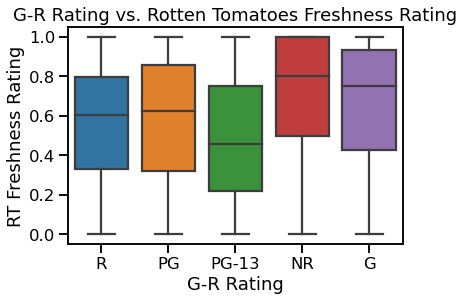

In [129]:
avg_fresh_box = sns.boxplot(x = 'GR_rating', y = 'fresh_avg', data = df2)
sns.set_context('talk')
avg_fresh_box.set_title('G-R Rating vs. Rotten Tomatoes Freshness Rating')
avg_fresh_box.set_xlabel('G-R Rating')
avg_fresh_box.set_ylabel("RT Freshness Rating")

In [47]:
if notebook_verbose:
    display(df_bom_movie_gross)

title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]

In [48]:
df_bom_movie_gross.year.sort_values()

0       2010
222     2010
221     2010
220     2010
219     2010
        ... 
3177    2018
3176    2018
3175    2018
3182    2018
3386    2018
Name: year, Length: 3387, dtype: int64

6)  What is the current market share of current studios, and what are their ROI/Critical Ratings? 

In [49]:
#I Joined in Studio information from the BOM table into df1b (NOTE the 'b'), so now I can work from that.  Note that not all
#title/year matches worked due to punctuation, etc.  But I will work with what I can.

#furthermore, due to mismatches, the gross values from BOM in df_bom_movie_gross don't tie out to the imdb file in df1. 
#(By movie, they usually match for revenue, but not always, and some movies just don't have a match in the other file)
#So, I'll use the df_bom_movie_gross file for just a Gross Revenue by studio graph, then refer to ROI and ratings
#By studio, Joined in from df1b.

#df_bom_movie_gross cleaning/rollup
df_bom_movie_gross.dropna(inplace=True)
df_bom_movie_gross['domestic_gross'] = df_bom_movie_gross['domestic_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
df_bom_movie_gross['foreign_gross'] = df_bom_movie_gross['foreign_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
display(df_bom_movie_gross)
df_bom_movie_gross['total_gross']=df_bom_movie_gross['domestic_gross'] + df_bom_movie_gross['foreign_gross']
bomgroup = df_bom_movie_gross.groupby('studio')
bom_studio_gross = bomgroup.sum().sort_values('total_gross',ascending=False, inplace=False).head(10)

display('bomstudiogross',bom_studio_gross)
display(bom_studio_gross.describe)


#df1b cleaning

df1b['budget'] = df1b['budget'].replace('[\$\,\.]',"",regex=True).astype(int)
df1b['Dom_gross'] = df1b['Dom_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
df1b['WW_gross'] = df1b['WW_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
df1b['runtime_minutes'] = df1b['runtime_minutes'].astype(float)
df1b['averagerating'] = df1b['averagerating'].astype(float)
df1b['year']=df1['year'].astype(int)
df1b['For_gross'] = df1b['WW_gross']-df1b['Dom_gross']
df1b['count'] = 1

#df1b['foreign_gross'] = df1b['foreign_gross'].replace('[\$\,\.]',"",regex=True).astype(int)

df1b.dropna(inplace=True)

display(df1b)
display('df1b info',df1b.info())
# studiosum = df2.groupby('studio').sum()
# studiosum['avg_rating']=studiosum.tot_rating/studiosum.count_rating
# studiosum['fresh_avg'] = studiosum.fresh_num/studiosum.fresh_count
# studiosum
studiogroup = df1b.groupby('studio')

studio_gross = studiogroup.sum().sort_values('WW_gross',ascending=False, inplace=False).head(10)
studio_gross['averagerating'] = studio_gross['averagerating']/studio_gross['count']
studio_gross['ROI'] = studio_gross['WW_gross']/studio_gross['budget']-1
display(studio_gross)
display(studio_gross.describe)


#df1b.info()
#studiogroup

title        studio  \
0                                           Toy Story 3            BV   
1                            Alice in Wonderland (2010)            BV   
2           Harry Potter and the Deathly Hallows Part 1            WB   
3                                             Inception            WB   
4                                   Shrek Forever After          P/DW   
...                                                 ...           ...   
3275                                    I Still See You           LGF   
3286                              The Catcher Was a Spy           IFC   
3309                                         Time Freak    Grindstone   
3342  Reign of Judges: Title of Liberty - Concept Short  Darin Southa   
3353            Antonio Lopez 1970: Sex Fashion & Disco            FM   

      domestic_gross  foreign_gross  year  
0          415000000      652000000  2010  
1          334200000      691300000  2010  
2          296000000      664300000  2010  
3          292600000      535700000  2010  
4          238700000      513900000  2010  
...              ...            ...   ...  
3275            1400        1500000  2018  
3286          725000         229000  2018  
3309           10000         256000  2018  
3342           93200           5200  2018  
3353           43200          30000  2018  

[2007 rows x 5 columns]

'bomstudiogross'

domestic_gross  foreign_gross    year   total_gross
studio                                                      
BV         1.839653e+10   2.579388e+10  209428  4.419041e+10
Fox        1.092450e+10   2.005587e+10  269857  3.098037e+10
WB         1.212360e+10   1.866790e+10  261801  3.079150e+10
Uni.       1.289204e+10   1.685480e+10  290029  2.974684e+10
Sony       8.459479e+09   1.394524e+10  211497  2.240472e+10
Par.       7.580813e+09   1.186338e+10  189311  1.944420e+10
WB (NL)    3.975100e+09   6.339000e+09   88628  1.031410e+10
LGF        3.991851e+09   4.475619e+09  175204  8.467471e+09
LG/S       1.965200e+09   3.353724e+09   74534  5.318924e+09
P/DW       1.682900e+09   3.393600e+09   20109  5.076500e+09

<bound method NDFrame.describe of          domestic_gross  foreign_gross    year   total_gross
studio                                                      
BV         1.839653e+10   2.579388e+10  209428  4.419041e+10
Fox        1.092450e+10   2.005587e+10  269857  3.098037e+10
WB         1.212360e+10   1.866790e+10  261801  3.079150e+10
Uni.       1.289204e+10   1.685480e+10  290029  2.974684e+10
Sony       8.459479e+09   1.394524e+10  211497  2.240472e+10
Par.       7.580813e+09   1.186338e+10  189311  1.944420e+10
WB (NL)    3.975100e+09   6.339000e+09   88628  1.031410e+10
LGF        3.991851e+09   4.475619e+09  175204  8.467471e+09
LG/S       1.965200e+09   3.353724e+09   74534  5.318924e+09
P/DW       1.682900e+09   3.393600e+09   20109  5.076500e+09>

movie  release_date    year  \
0     Pirates of the Caribbean: On Stranger Tides  May 20, 2011  2011.0   
2                         Avengers: Age of Ultron   May 1, 2015  2015.0   
3                          Avengers: Infinity War  Apr 27, 2018  2018.0   
4                                  Justice League  Nov 17, 2017  2017.0   
5                                         Spectre   Nov 6, 2015  2015.0   
...                                           ...           ...     ...   
1392                                  Patti Cake$  Aug 18, 2017  2017.0   
1411                            Fruitvale Station  Jul 12, 2013  2013.0   
1434                                     Monsters  Oct 29, 2010  2010.0   
1453                                   Like Crazy  Oct 28, 2011  2011.0   
1469                                Another Earth  Jul 22, 2011  2011.0   

         budget  Dom_gross    WW_gross  runtime_minutes  \
0     410600000  241063875  1045663875            136.0   
2     330600000  459005868  1403013963            141.0   
3     300000000  678815482  2048134200            149.0   
4     300000000  229024295   655945209            120.0   
5     300000000  200074175   879620923            148.0   
...         ...        ...         ...              ...   
1392    1000000     800148     1471090            109.0   
1411     900000   16098998    17549645             85.0   
1434     500000     237301     5639730             94.0   
1453     250000    3395391     3728400             86.0   
1469     175000    1321194     2102779             92.0   

                         genres  averagerating studio  domestic_gross  \
0      Action,Adventure,Fantasy            6.6     BV     241100000.0   
2       Action,Adventure,Sci-Fi            7.3     BV     459000000.0   
3       Action,Adventure,Sci-Fi            8.5     BV     678800000.0   
4      Action,Adventure,Fantasy            6.5     WB     229000000.0   
5     Action,Adventure,Thriller            6.8   Sony     200100000.0   
...                         ...            ...    ...             ...   
1392                Drama,Music            6.7   FoxS        800000.0   
1411    Biography,Drama,Romance            7.5  Wein.      16100000.0   
1434      Drama,Sci-Fi,Thriller            6.4  Magn.        237000.0   
1453              Drama,Romance            6.7   ParV       3400000.0   
1469       Drama,Romance,Sci-Fi            7.0   FoxS       1300000.0   

     foreign_gross   For_gross  count  
0        804600000   804600000      1  
2        946400000   944008095      1  
3          1,369.5  1369318718      1  
4        428900000   426920914      1  
5        680600000   679546748      1  
...            ...         ...    ...  
1392        682000      670942      1  
1411       1300000     1450647      1  
1434       4000000     5402429      1  
1453        336000      333009      1  
1469        456000      781585      1  

[934 rows x 14 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie            934 non-null    object 
 1   release_date     934 non-null    object 
 2   year             934 non-null    float64
 3   budget           934 non-null    int32  
 4   Dom_gross        934 non-null    int32  
 5   WW_gross         934 non-null    int32  
 6   runtime_minutes  934 non-null    float64
 7   genres           934 non-null    object 
 8   averagerating    934 non-null    float64
 9   studio           934 non-null    object 
 10  domestic_gross   934 non-null    float64
 11  foreign_gross    934 non-null    object 
 12  For_gross        934 non-null    int32  
 13  count            934 non-null    int64  
dtypes: float64(4), int32(4), int64(1), object(5)
memory usage: 94.9+ KB


'df1b info'

None

year        budget     Dom_gross      WW_gross  runtime_minutes  \
studio                                                                         
BV       138974.0  9.485800e+09  1.299392e+10  3.378012e+10           8047.0   
Uni.     227566.0  6.391700e+09  1.049778e+10  2.680145e+10          12355.0   
Fox      203383.0  7.278000e+09  8.870743e+09  2.515321e+10          11034.0   
WB       189293.0  7.967500e+09  8.988514e+09  2.190611e+10          10852.0   
Sony     136929.0  4.787500e+09  6.608782e+09  1.678608e+10           7421.0   
Par.     126855.0  4.308000e+09  5.501003e+09  1.337228e+10           7091.0   
WB (NL)   70493.0  2.133500e+09  3.374274e+09  8.478520e+09           3875.0   
LGF       96664.0  1.903288e+09  2.973683e+09  6.473637e+09           5186.0   
P/DW      20109.0  1.334000e+09  1.682915e+09  5.078028e+09           1015.0   
LG/S      48333.0  1.277500e+09  1.114139e+09  3.040543e+09           2623.0   

         averagerating  domestic_gross     For_gross  count       ROI  
studio                                                                 
BV            7.046377    1.299470e+10  2.078620e+10     69  2.561125  
Uni.          6.234513    1.050144e+10  1.630367e+10    113  3.193164  
Fox           6.386139    8.865400e+09  1.628247e+10    101  2.456061  
WB            6.573404    8.986200e+09  1.291759e+10     94  1.749433  
Sony          6.244118    6.609000e+09  1.017729e+10     68  2.506230  
Par.          6.384127    5.499000e+09  7.871273e+09     63  2.104057  
WB (NL)       6.325714    3.374300e+09  5.104246e+09     35  2.973996  
LGF           6.393750    2.973500e+09  3.499955e+09     48  2.401292  
P/DW          6.760000    1.682900e+09  3.395113e+09     10  2.806617  
LG/S          6.491667    1.113900e+09  1.926404e+09     24  1.380073

<bound method NDFrame.describe of              year        budget     Dom_gross      WW_gross  runtime_minutes  \
studio                                                                         
BV       138974.0  9.485800e+09  1.299392e+10  3.378012e+10           8047.0   
Uni.     227566.0  6.391700e+09  1.049778e+10  2.680145e+10          12355.0   
Fox      203383.0  7.278000e+09  8.870743e+09  2.515321e+10          11034.0   
WB       189293.0  7.967500e+09  8.988514e+09  2.190611e+10          10852.0   
Sony     136929.0  4.787500e+09  6.608782e+09  1.678608e+10           7421.0   
Par.     126855.0  4.308000e+09  5.501003e+09  1.337228e+10           7091.0   
WB (NL)   70493.0  2.133500e+09  3.374274e+09  8.478520e+09           3875.0   
LGF       96664.0  1.903288e+09  2.973683e+09  6.473637e+09           5186.0   
P/DW      20109.0  1.334000e+09  1.682915e+09  5.078028e+09           1015.0   
LG/S      48333.0  1.277500e+09  1.114139e+09  3.040543e+09           2623.0   

     

In [50]:
#We inspect top 10 average rating studios as well, but these are much smaller volume studios.
studio_rating = studiogroup.mean().sort_values('averagerating',ascending=False, inplace=False)
display(studio_rating)


year      budget   Dom_gross      WW_gross  runtime_minutes  \
studio                                                                      
UTV       2016.000   9500000.0  12391761.0  2.946546e+08         161.0000   
GrtIndia  2017.000  30000000.0  18985794.0  2.635029e+08         167.0000   
Neon      2017.000  11000000.0  30014534.0  5.379741e+07         120.0000   
Drft.     2010.000   3750000.0    310007.0  2.436111e+06          97.0000   
SPC       2011.375  10653125.0  10533447.5  3.720372e+07         110.0625   
...            ...         ...         ...           ...              ...   
MNE       2012.500  13750000.0    338600.0  1.246294e+07          96.0000   
Free      2010.000  49000000.0    152398.5  1.289010e+07         104.0000   
RTWC      2012.500   3900000.0    611309.5  8.535980e+06          88.5000   
Eros      2010.000  10100000.0   1183658.0  1.872630e+07         144.0000   
BG        2016.000  15000000.0  17784499.5  2.193788e+07          97.5000   

          averagerating  domestic_gross     For_gross  count  
studio                                                        
UTV             8.50000      12400000.0  2.822629e+08      1  
GrtIndia        8.30000      20200000.0  2.445171e+08      1  
Neon            7.50000      30000000.0  2.378288e+07      1  
Drft.           7.30000        305000.0  2.126104e+06      1  
SPC             7.28125      10525000.0  2.667027e+07      1  
...                 ...             ...           ...    ...  
MNE             5.75000        347000.0  1.212434e+07      1  
Free            5.55000        152000.0  1.273771e+07      1  
RTWC            5.50000        613500.0  7.924671e+06      1  
Eros            5.50000       1200000.0  1.754264e+07      1  
BG              5.35000      17800000.0  4.153386e+06      1  

[61 rows x 9 columns]

In [51]:
#Visualization 1

#bom_studio_gross

#Caveat - this is Gross Revenue data from BOM file.  This does not tie out to the IMDB totals, including budget, used for ROI
#

with plt.style.context('seaborn-colorblind'):
#with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 7))

    #ax.bar(x=studio_gross.index, height = studio_gross['Dom_gross'], label='Domestic')
    #ax.bar(x=studio_gross.index, height = studio_gross['For_gross'], bottom=studio_gross['Dom_gross'], label='Foreign')
    ax.bar(x=bom_studio_gross.index, height = bom_studio_gross['domestic_gross'], label='Domestic')
    ax.bar(x=bom_studio_gross.index, height = bom_studio_gross['foreign_gross'], bottom=bom_studio_gross['domestic_gross'], label='Foreign')

    ax.set_title('Total Domestic + Foreign Gross By Studio, 2010-2018')
    ax.set_xlabel('Studio')
    ax.set_ylabel('Dollars (in $10,000,000,000\'s)')
    #ax.bar_label()
    ax.legend()

In [52]:
#Vis2
#By studio, inspect ROI and Rating
#display(studio_gross)
#display(studio_gross.describe)
with plt.style.context('seaborn-colorblind'):
#with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 7))

    #ax.bar(x=studio_gross.index, height = studio_gross['Dom_gross'], label='Domestic')
    #ax.bar(x=studio_gross.index, height = studio_gross['For_gross'], bottom=studio_gross['Dom_gross'], label='Foreign')
#    ax.scatter(x=bom_studio_gross.index, y = bom_studio_gross['domestic_gross'], label='Domestic')
#    ax.scatter(x=bom_studio_gross.index, y = bom_studio_gross['foreign_gross'], bottom=bom_studio_gross['domestic_gross'], label='Foreign')
    sns.scatterplot(x='studio', y='ROI', data = studio_gross, ax = ax, label='ROI' )
    sns.scatterplot(x='studio', y='averagerating', data = studio_gross, ax = ax, label='Average Rating')
    ax.set_xlim(-1, 10) 
    ax.set_ylim(-1, 10)

    ax.set_title('ROI & Average Critical Rating by Studio')
    ax.set_xlabel('Studio')
    ax.set_ylabel('ROI and Average Rating')
    #ax.bar_label()
    ax.legend()
    
    
    

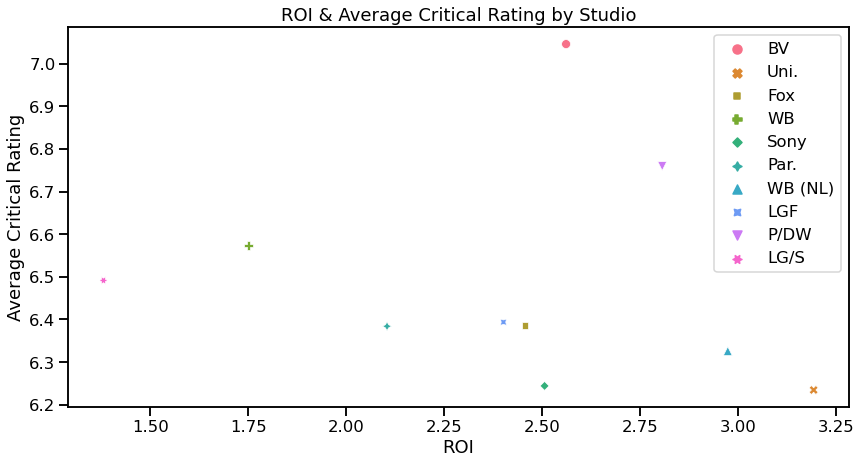

In [130]:
with plt.style.context('seaborn-colorblind'):
#with plt.style.context('fivethirtyeight'):
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(14, 7))


    sns.scatterplot(data=studio_gross, x="ROI", y="averagerating",hue='studio', style='studio')
    #ax.set_xlim(1, 3.5) 
    #ax.set_ylim(-1, 10)

    ax.set_title('ROI & Average Critical Rating by Studio')
    ax.set_xlabel('ROI')
    ax.set_ylabel('Average Critical Rating')
    #ax.bar_label()
    ax.legend()


#sns.scatterplot(data=studio_gross, x="ROI", y="averagerating",hue='studio')

#sns.scatterplot(data=tips,
#                 x="total_bill",
#                 y="tip",
#                 hue="sex"
#                )



# Next Step Ideas:  
- Analyze release date (seasonal, month, day/holiday) 
- Identify successful directors/actors/combinations
- Look into correlation of runtime with movie success

In [ ]:
#Here is our cell at the end that deletes local zipped files
def delDir(dir_name, verbose=False):
    for name in os.listdir(dir_name):
        path = os.path.join(dir_name, name)
        if verbose: print('Inspecting:', name)
        if os.path.isfile(path) and path[-3:]!='.gz':
            if verbose: print('Deleting:',name)
            os.remove(path)
#delDir(dir_to_unzip, True)


###Remember to close and delete the SQL db at the end
#conn.commit()
#conn.close()